<a href="https://colab.research.google.com/github/adarshbaronia/Data-Analysis/blob/master/Categorizing_and_Tagging_Words_ch05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
text=nltk.word_tokenize('And now for something completely different')
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [ ]:
text1 = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text1)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [ ]:
text2=nltk.word_tokenize('i like to go to walk')
text3=nltk.word_tokenize('would you go for a walk')
nltk.pos_tag(text2)


[('i', 'NNS'),
 ('like', 'VBP'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('to', 'TO'),
 ('walk', 'VB')]

In [ ]:
nltk.pos_tag(text3)

[('would', 'MD'),
 ('you', 'PRP'),
 ('go', 'VB'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('walk', 'NN')]

In [ ]:
nltk.download('brown')
t=nltk.Text(word.lower() for word in nltk.corpus.brown.words())
t[:10]

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


['the',
 'fulton',
 'county',
 'grand',
 'jury',
 'said',
 'friday',
 'an',
 'investigation',
 'of']

In [ ]:
t.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


In [ ]:
t.similar('bought')

made said done put had seen found given left heard was been brought
set got that took in told felt


In [ ]:
t.similar('over')

in on to of and for with from at by that into as up out down through
is all about


In [ ]:
t.similar('the')

a his this their its her an that our any all one these my in your no
some other and


In [ ]:
t.similar('scrobbling')

No matches


In [ ]:
nltk.download('indian')
nltk.corpus.indian.tagged_words()[:20]

[nltk_data] Downloading package indian to /root/nltk_data...
[nltk_data]   Package indian is already up-to-date!


[('মহিষের', 'NN'),
 ('সন্তান', 'NN'),
 (':', 'SYM'),
 ('তোড়া', 'NNP'),
 ('উপজাতি', 'NN'),
 ('৷', 'SYM'),
 ('বাসস্থান-ঘরগৃহস্থালি', 'NN'),
 ('তোড়া', 'NNP'),
 ('ভাষায়', 'NN'),
 ('গ্রামকেও', 'NN'),
 ('বলে', 'VM'),
 ('`', 'SYM'),
 ('মোদ', 'NN'),
 ("'", 'SYM'),
 ('৷', 'SYM'),
 ('মোদের', 'NN'),
 ('আয়তন', 'NN'),
 ('খুব', 'INTF'),
 ('বড়ো', 'JJ'),
 ('নয়', 'VM')]

In [ ]:
from nltk.corpus import brown

nltk.download('universal_tagset')

#tagg=brown.tagged_words(categories='news', simplify_tags=True)
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.keys()

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


dict_keys(['DET', 'NOUN', 'ADJ', 'VERB', 'ADP', '.', 'ADV', 'CONJ', 'PRT', 'PRON', 'NUM', 'X'])

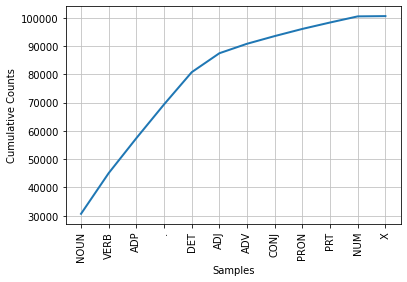

In [ ]:
tag_fd.plot(cumulative=True)

In [ ]:
learned=nltk.corpus.brown.tagged_words(categories='learned', tagset='universal')
tags=[b[1] for (a,b) in nltk.bigrams(learned) if a[0]=='often']
fq=nltk.FreqDist(tags)
fq.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [ ]:
from nltk.corpus import brown
def process(sentence):
  for (w1,t1),(w2,t2),(w3,t3) in nltk.trigrams(sentence):
    if t1.startswith('V') and t2=='TO' and t3.startswith('V'):
      print(w1,w2,w3)

In [ ]:
for tagged_sent in brown.tagged_sents():
  process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet
hastened to add
found to prevent
continue to insist
compelled to make
made to remove
revamped to give
want to risk
appear to spark
fails to consider
plans to call
going to examine
plans to name
come to pass
voted to accept
happens to hold
authorized to adopt
hesitated to prosecute
try to make
decided to spend
taken to preserve
left to preserve
stand to bring
decided to seek
trying to induce
proposing to make
decided to run
directed to investigate
expected to pass
expected to make
expected to encounter
hopes to pass
came to pay
expected to receive
understood to follow
wanted to vote
decide

In [ ]:
news=brown.tagged_words(categories='news', tagset='universal')
data=nltk.ConditionalFreqDist((word.lower(),tag) for (word,tag) in news)
for word in data.conditions():
   if len(data[word])>3:
     tags=data[word].keys()
     print(word, ' '.join(tags))

that ADP PRON DET ADV
best ADJ ADV VERB NOUN
present ADJ ADV NOUN VERB
close NOUN ADJ ADV VERB
open ADJ ADV VERB NOUN


In [ ]:
from nltk.text import Text
testlist=Text(news)

In [ ]:
#testlist.concordance('open')

AttributeError: ignored

In [ ]:
nltk.download('gutenberg')
from nltk.corpus import gutenberg

t=gutenberg.words('carroll-alice.txt')
fr=nltk.FreqDist(t)
vocab=list(fr)[:1000]
mapping=nltk.defaultdict(lambda :'UNK')
for v in vocab:
  mapping[v]=v
  

In [ ]:
t2=[mapping[v] for v in t]
t2[:10]

In [ ]:
counts=nltk.defaultdict(int)
from nltk.corpus import brown
for (word,tag) in brown.tagged_words(categories='news', tagset='universal'):
  counts[tag]+=1
counts['NOUN']


In [ ]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

In [ ]:
tags=[tag for (word, tag) in brown.tagged_words(categories='news', tagset='universal')]
maxtag=nltk.FreqDist(tags).max()
maxtag

'NOUN'

In [1]:
!pip install winsound

ERROR: Could not find a version that satisfies the requirement winsound (from versions: none)
ERROR: No matching distribution found for winsound
